In [1]:
%load_ext autoreload
%autoreload 2


import mahotas as mh
import numpy as np
import os
import time

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import mlproof as mlp

mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
PATCH_PATH = '/home/d/patches/cylinder2_rgb/'

In [3]:


def generate_patches(start_slice, end_slice):

    patch_index = 0

    all_patches_count = 0

    all_error_patches = []
    all_correct_patches = []
    
    for z in range(start_slice, end_slice):

        t0 = time.time()
        print 'working on slice', z
        input_image, input_prob, input_mask, input_gold, input_rhoana = mlp.Util.read_section('/home/d/data/cylinderNEW/',z)

        error_patches, patches = mlp.Patch.patchify_maxoverlap(input_image, input_prob, input_mask, input_rhoana, input_gold, sample_rate=1)

#         for e in patches:
#             if e['image'].max() == 0.:
#                 print 'ZERRRRO', z
        
        print 'Generated', len(error_patches), 'split error patches and', len(patches), ' correct patches in', time.time()-t0, 'seconds.'
        
        all_error_patches += error_patches
        all_correct_patches += patches
        
    
    
    NO_PATCHES = len(all_error_patches) + len(all_correct_patches)

    print 'We have a total of',NO_PATCHES,'patches.'
    print 'Errors:',len(all_error_patches)
    print 'Correct:',len(all_correct_patches)    
    
    PATCH_BYTES = 75*75
    P_SIZE = (NO_PATCHES, 3, 75,75) # rather than raveled right now
    
    p_rgba = np.zeros(P_SIZE, dtype=np.float32)   
    p_target = np.zeros(NO_PATCHES)


    i = 0
    for p in all_error_patches:

        p_rgba[i][0] = p['image']
        p_rgba[i][1] = 1. - p['prob']
        p_rgba[i][2] = p['merged_array']

        p_target[i] = 1 # <--- important
        i += 1

        
    for p in all_correct_patches:

        p_rgba[i][0] = p['image']
        p_rgba[i][1] = 1. - p['prob']
        p_rgba[i][2] = p['merged_array']     
        
        p_target[i] = 0 # <--- important
        i+=1
        
    
    return p_rgba, p_target



def shuffle_in_unison_inplace(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]



def run(start_slice, end_slice, filename):
    
    if not os.path.exists(PATCH_PATH):
        os.makedirs(PATCH_PATH)
    
    p = generate_patches(start_slice, end_slice)
    
    np.savez(PATCH_PATH+filename+'_unshuffled.npz', rgb=p[0])
    np.savez(PATCH_PATH+filename+'_targets_unshuffled.npz', targets=p[1])
    print 'unshuffled saved'
    shuffled = shuffle_in_unison_inplace(p[0],
                                         p[1]
                                        )
    
    print 'saving..'
    np.savez(PATCH_PATH+filename+'.npz', rgb=shuffled[0])
    np.savez(PATCH_PATH+filename+'_targets.npz', targets=shuffled[1])
    print 'Done!'
    
#     return shuffled


In [4]:
run(0,250, 'train')
run(250,300, 'test')

working on slice 0
Loading z00000000.png
Generated 0 split error patches and 0  correct patches in 1.42374587059 seconds.
working on slice 1
Loading z00000001.png
Generated 0 split error patches and 0  correct patches in 1.1143951416 seconds.
working on slice 2
Loading z00000002.png
Generated 0 split error patches and 0  correct patches in 1.09304118156 seconds.
working on slice 3
Loading z00000003.png
Generated 0 split error patches and 0  correct patches in 1.08846592903 seconds.
working on slice 4
Loading z00000004.png
Generated 0 split error patches and 0  correct patches in 1.09170603752 seconds.
working on slice 5
Loading z00000005.png
Generated 0 split error patches and 0  correct patches in 1.0868678093 seconds.
working on slice 6
Loading z00000006.png
Generated 0 split error patches and 0  correct patches in 1.11397886276 seconds.
working on slice 7
Loading z00000007.png
Generated 0 split error patches and 0  correct patches in 1.21033501625 seconds.
working on slice 8
Loading

In [5]:
X_train, y_train, X_test, y_test = mlp.Patch.load_rgb('cylinder2_rgb')

Loaded /home/d/patches//cylinder2_rgb/ in 0.00716710090637 seconds.


In [6]:
X_train[0][0]

array([[ 0.29803923,  0.27058825,  0.22352941, ...,  0.63137257,
         0.69803923,  0.72941178],
       [ 0.36862746,  0.26666668,  0.19607843, ...,  0.65882355,
         0.66274512,  0.66666669],
       [ 0.49019608,  0.47843137,  0.41176471, ...,  0.68235296,
         0.6156863 ,  0.64705884],
       ..., 
       [ 0.39607844,  0.6156863 ,  0.66274512, ...,  0.42745098,
         0.41568628,  0.40784314],
       [ 0.44313726,  0.59215689,  0.66666669, ...,  0.34901962,
         0.35686275,  0.3764706 ],
       [ 0.6156863 ,  0.60784316,  0.627451  , ...,  0.27450982,
         0.27058825,  0.21960784]], dtype=float32)

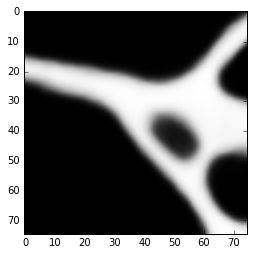

In [24]:
imshow(X_train[3][1], cmap='gray')

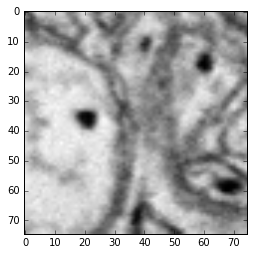

In [27]:
imshow(X_train[4][0], cmap='gray')

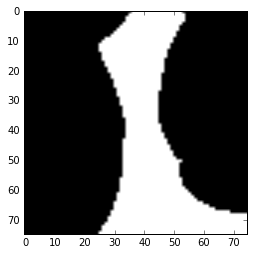

In [26]:
imshow(X_train[4][2], cmap='gray')

In [25]:
y_train[4]

1